In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
toyota=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')


In [4]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
print('Number of Rows{}Columns'.format(toyota.shape))

Number of Rows(1436, 38)Columns


In [6]:
toyota=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
toyota=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota

,KM,HP,Gears,Weight
0,46986,90,5,1165
1,72937,90,5,1165
2,41711,90,5,1165
3,48000,90,5,1165
4,38500,90,5,1170
...,...,...,...,...
1431,20544,86,5,1025
1432,19000,86,5,1015
1433,17016,86,5,1015
1434,16916,86,5,1015


In [10]:
toyota=toyota.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota

,KM,HP,Gears,Weight
0,46986,90,5,1165
1,72937,90,5,1165
2,41711,90,5,1165
3,48000,90,5,1165
4,38500,90,5,1170
...,...,...,...,...
1431,20544,86,5,1025
1432,19000,86,5,1015
1433,17016,86,5,1015
1434,16916,86,5,1015


In [11]:
toyota[toyota.values==0.0]

,KM,HP,Gears,Weight


In [12]:
toyota.isnull().sum()

KM        0
HP        0
Gears     0
Weight    0
dtype: int64

<Axes: >

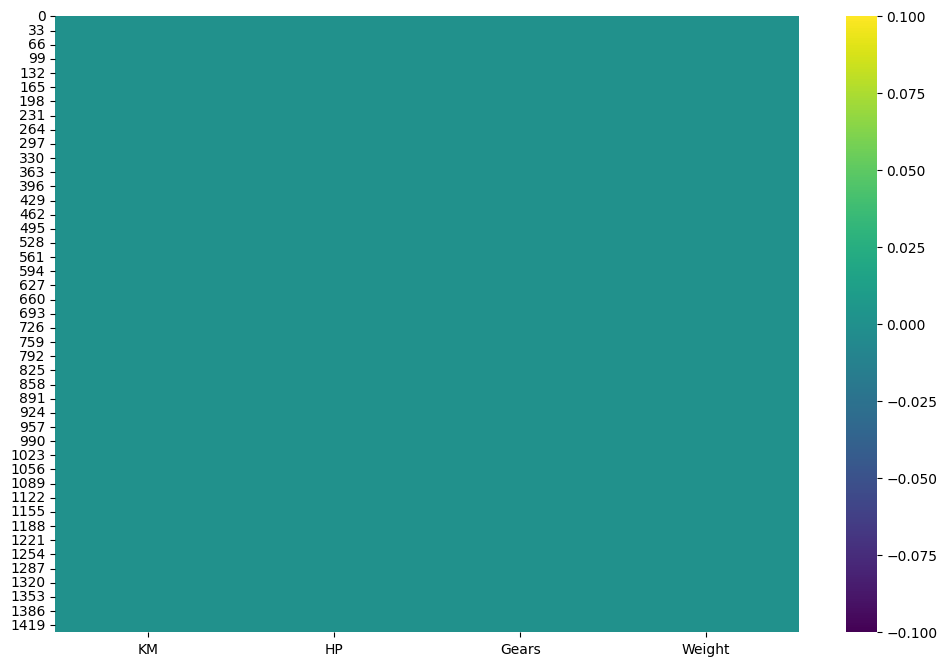

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(toyota.isnull(),cmap='viridis')

In [14]:
toyota.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

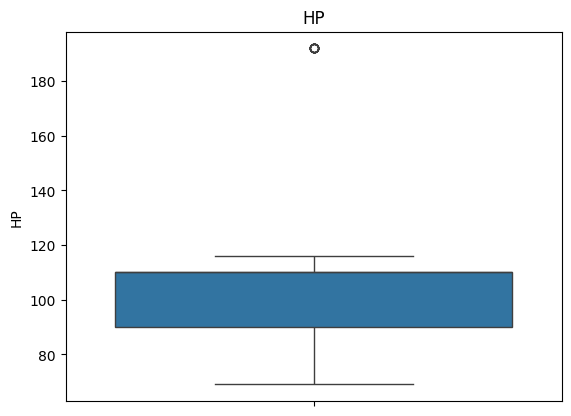

In [15]:
sns.boxplot(toyota['HP'])
plt.title('HP')
plt.show()

<Axes: >

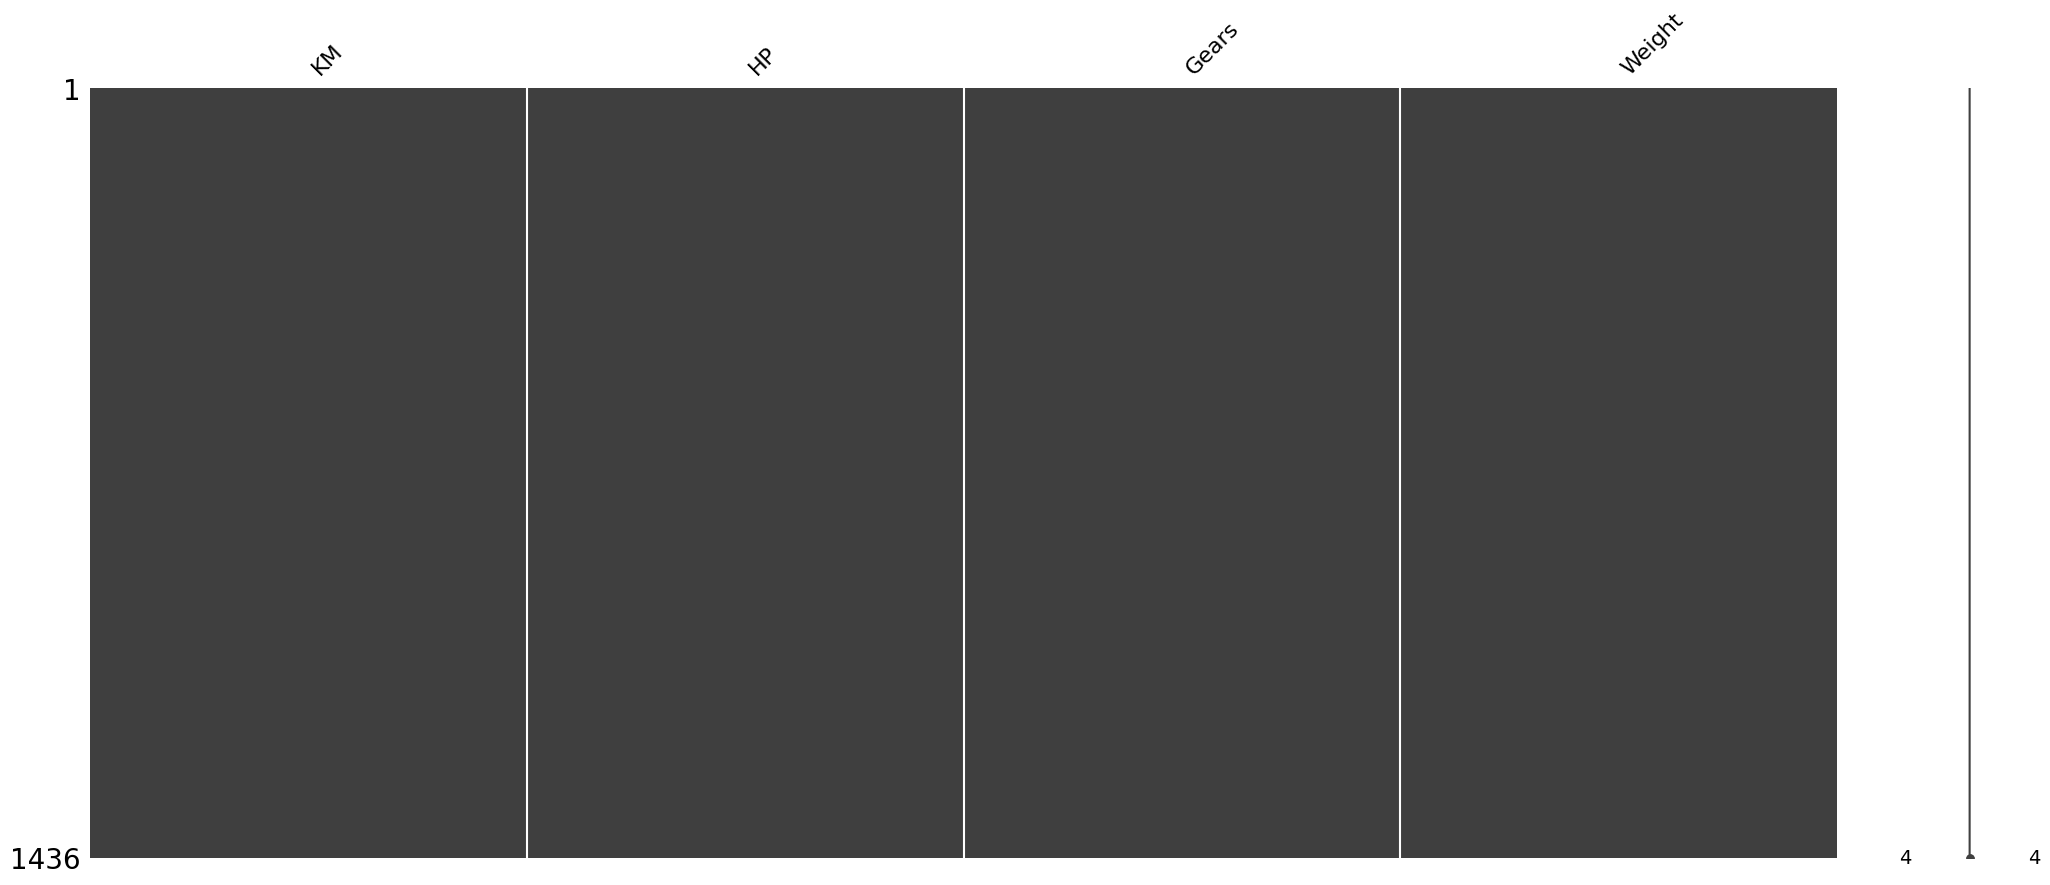

In [16]:
mn.matrix(toyota)

In [17]:
toyota[toyota.duplicated()].shape

(26, 4)

In [18]:
toyota[toyota.duplicated()]

,KM,HP,Gears,Weight
107,10000,97,5,1100
113,13253,116,5,1320
178,5000,110,5,1130
185,1,110,5,1075
517,52000,97,5,1025
561,39000,97,5,1025
565,37000,97,5,1025
568,36000,110,5,1075
576,34000,110,5,1075
602,31000,97,5,1025


In [19]:
toyota=toyota.drop_duplicates().reset_index(drop=True)
toyota[toyota.duplicated()]

,KM,HP,Gears,Weight


In [20]:
discrete_feature=[feature for feature in toyota.columns if len(toyota[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [21]:
continuous_feature=[feature for feature in toyota.columns if toyota[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 2


Text(0.5, 1.0, 'Weight')

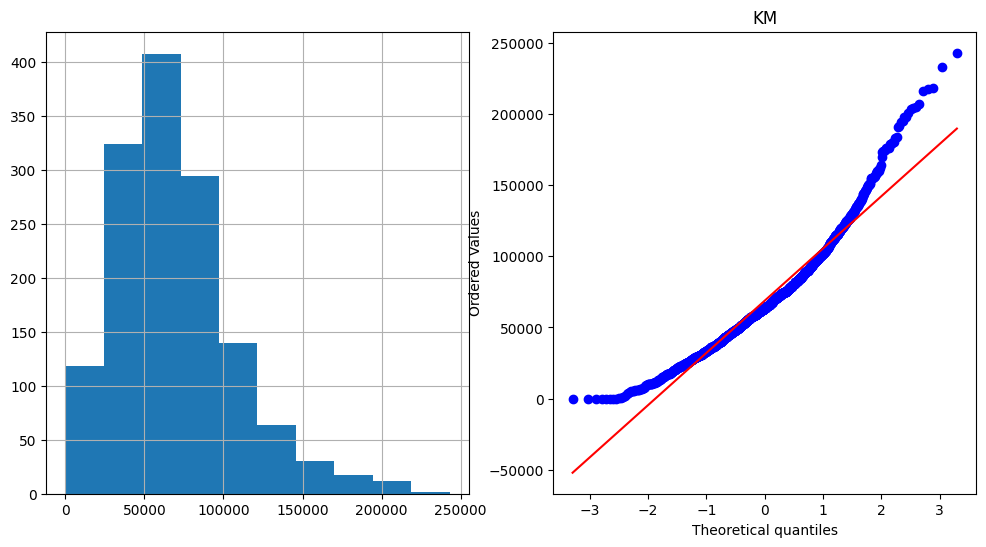

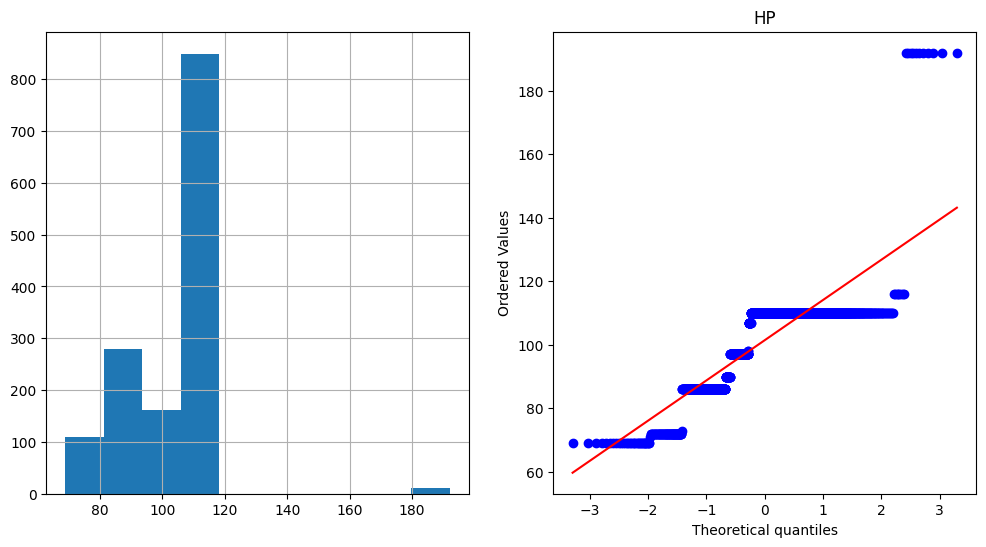

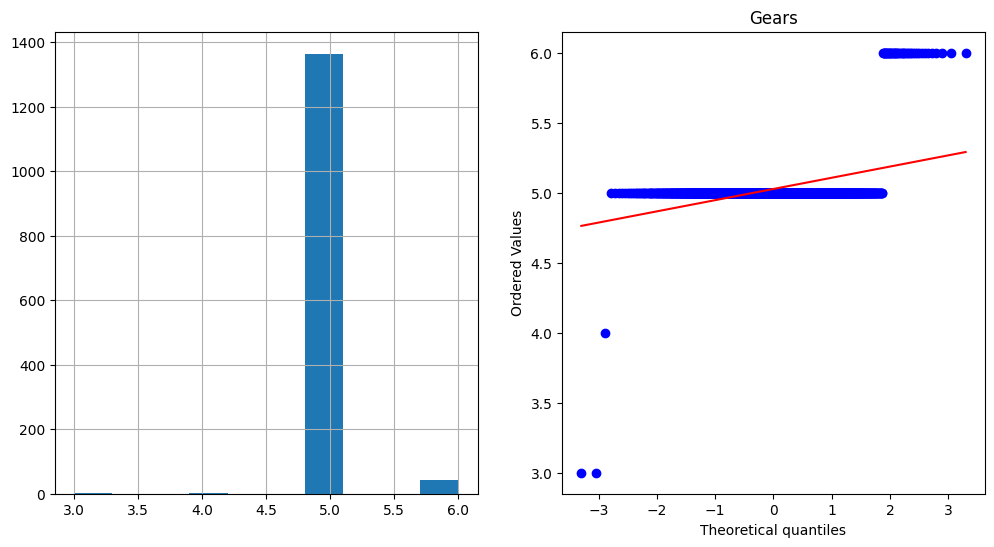

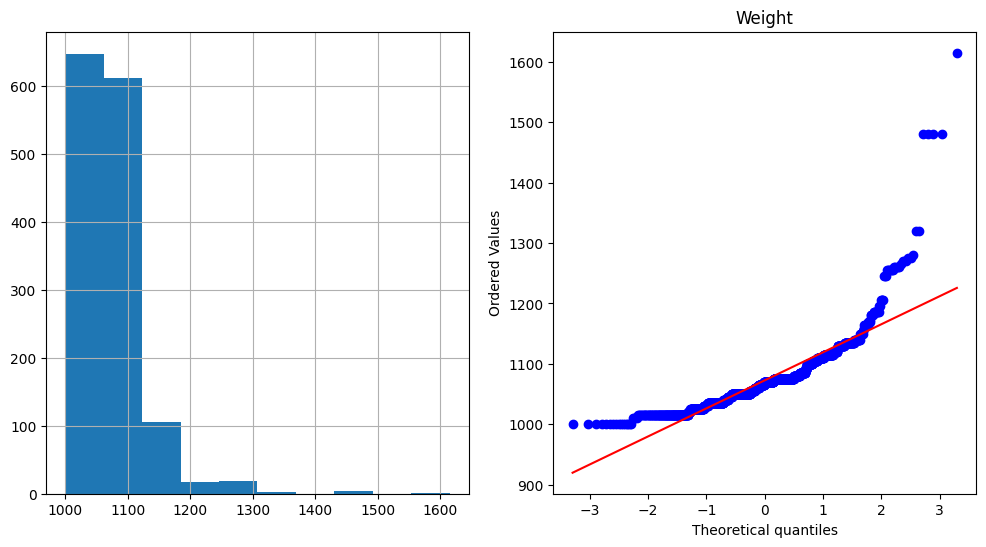

In [22]:
import pylab
def plot_toyota(toyota,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    toyota[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(toyota[feature],dist='norm',plot=pylab)
plot_toyota(toyota,'KM')
plt.title('KM')
plot_toyota(toyota,'HP')
plt.title('HP')
plot_toyota(toyota,'Gears')
plt.title('Gears')
plot_toyota(toyota,'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

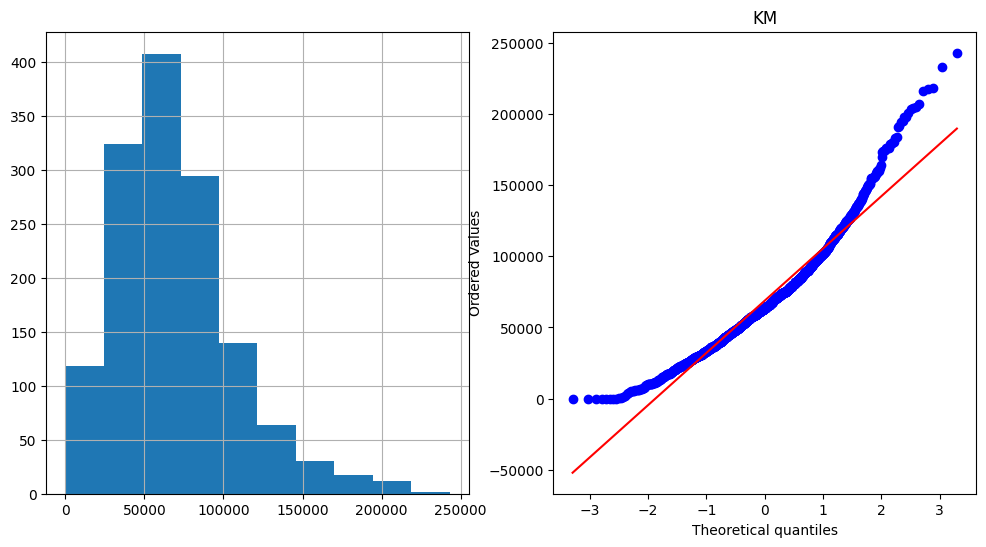

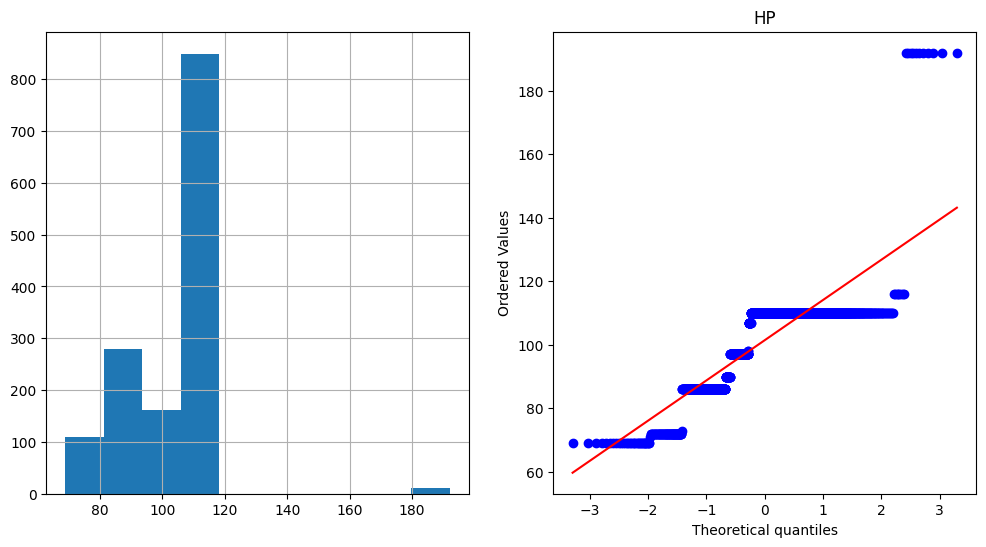

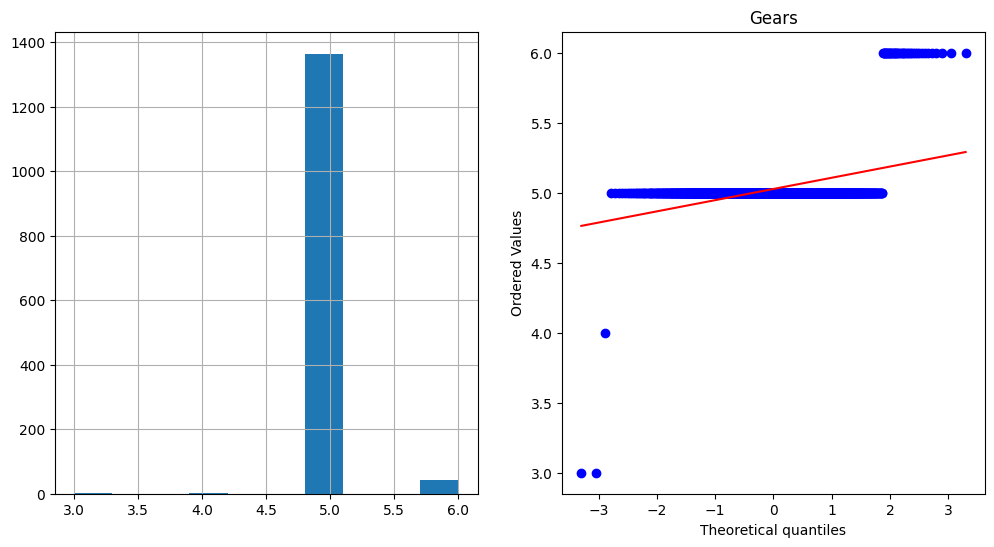

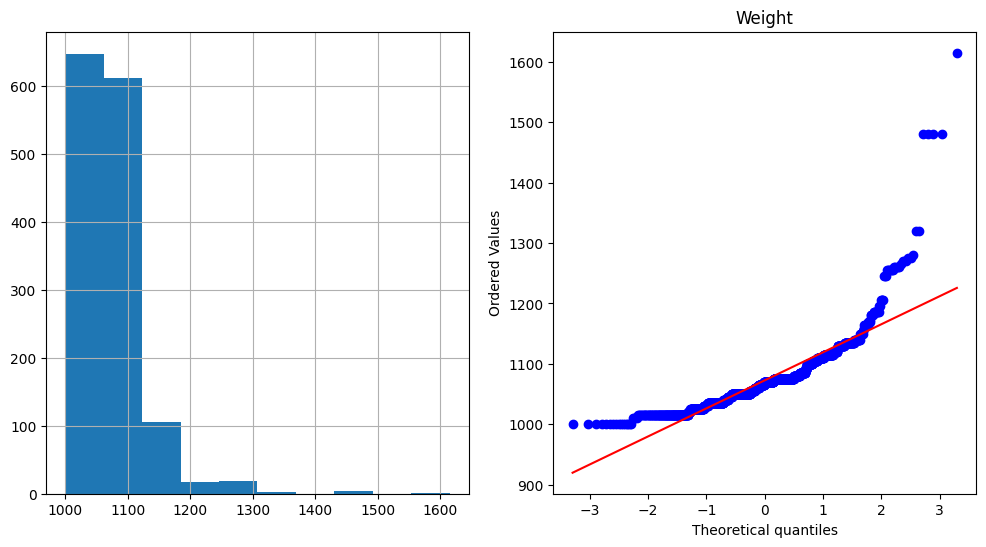

In [23]:
df=toyota.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_toyota(toyota,'KM')
plt.title('KM')
plot_toyota(toyota,'HP')
plt.title('HP')
plot_toyota(toyota,'Gears')
plt.title('Gears')
plot_toyota(toyota,'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

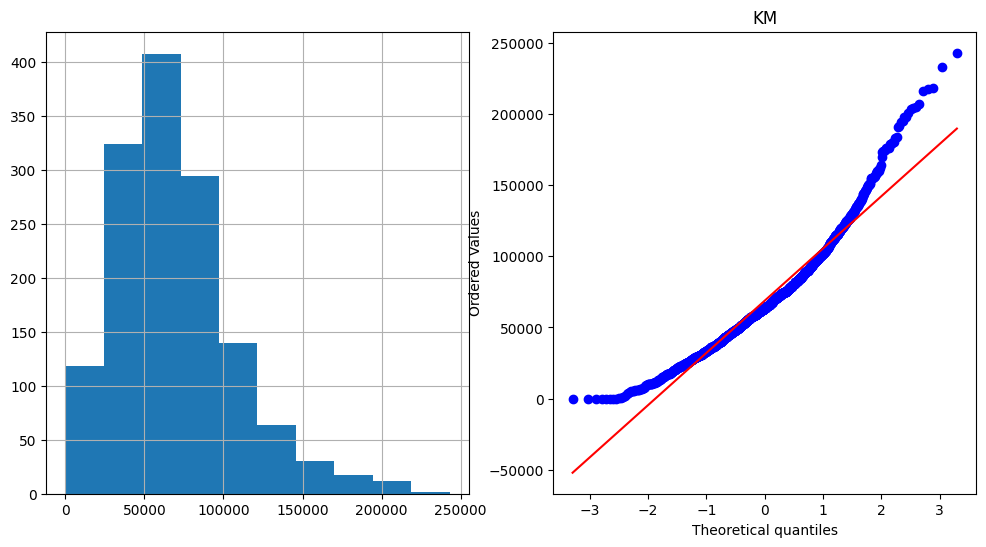

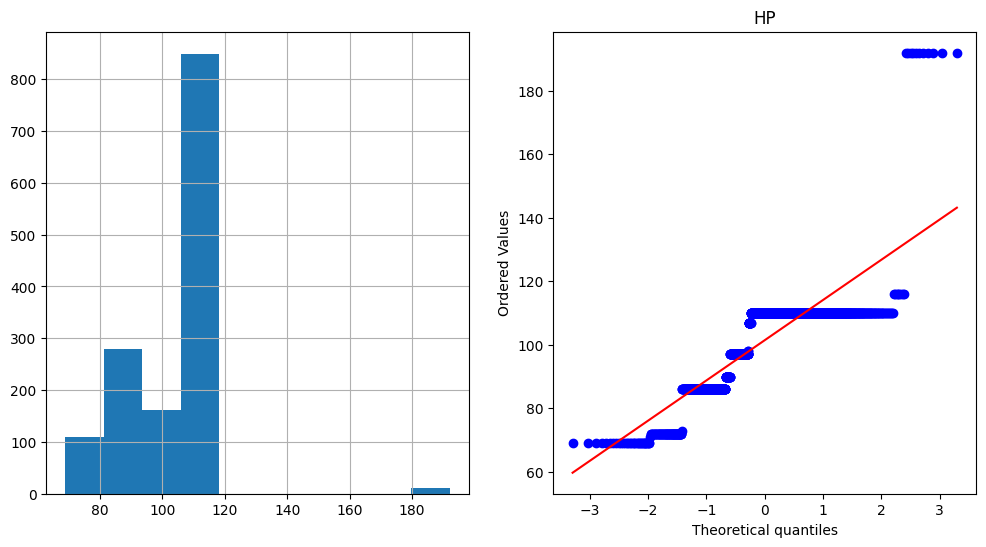

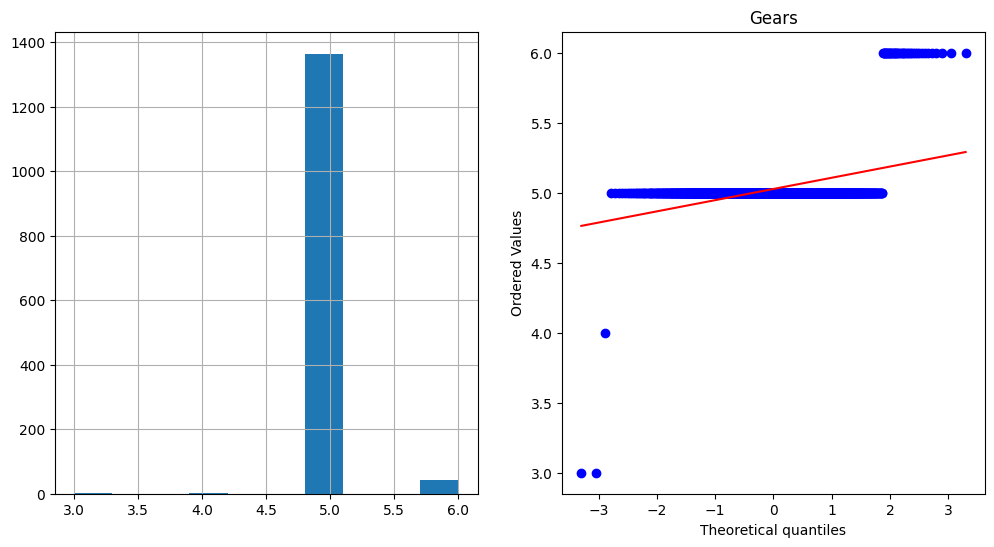

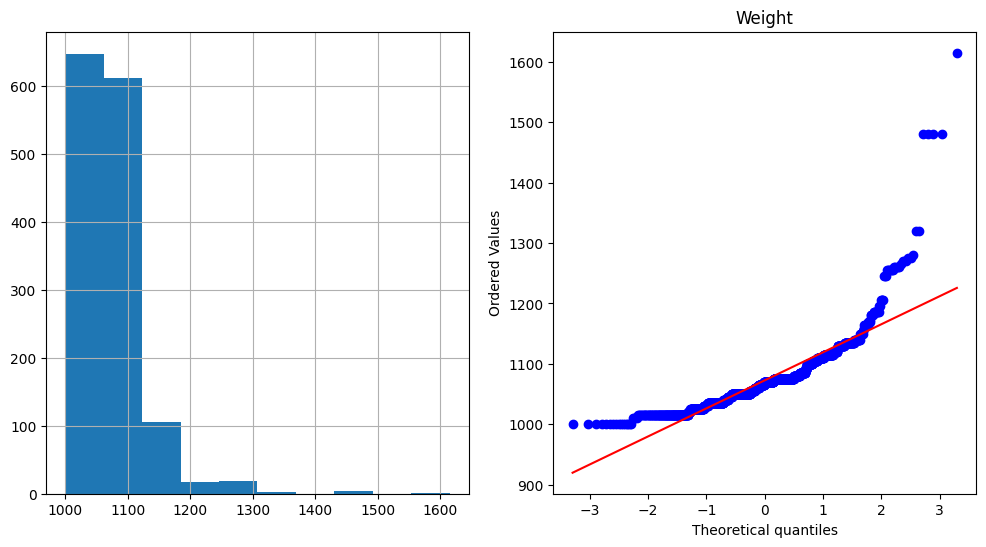

In [24]:
df=toyota.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])


plot_toyota(toyota,'KM')
plt.title('KM')
plot_toyota(toyota,'HP')
plt.title('HP')
plot_toyota(toyota,'Gears')
plt.title('Gears')
plot_toyota(toyota,'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

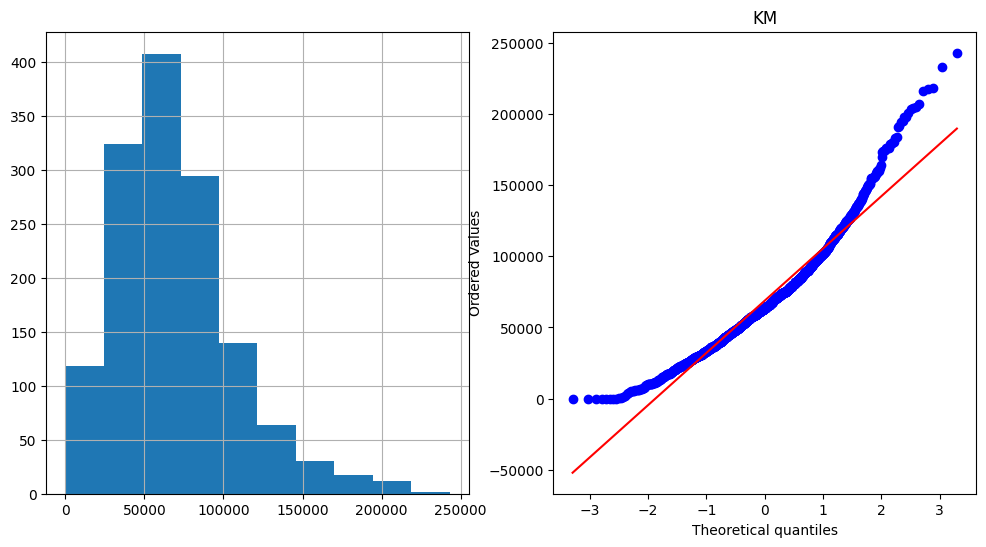

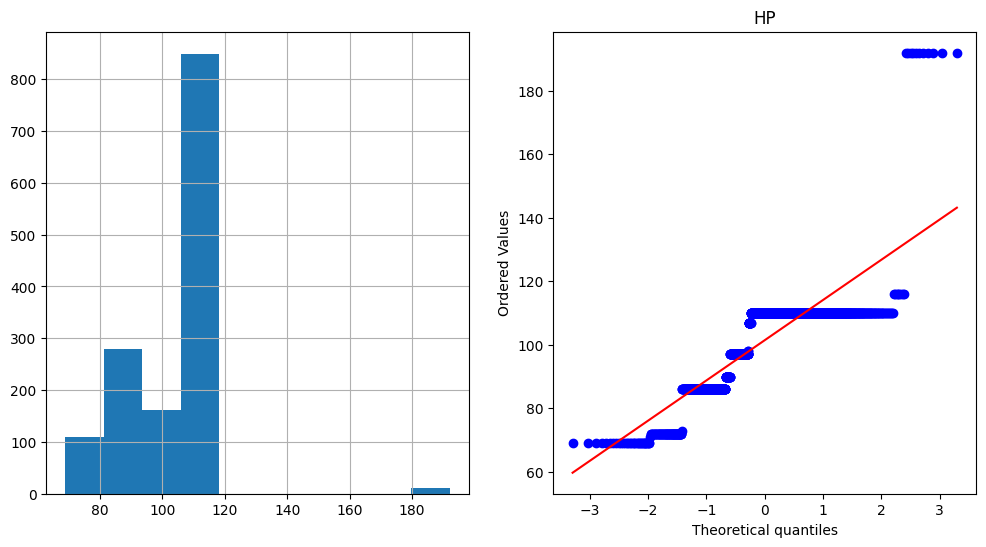

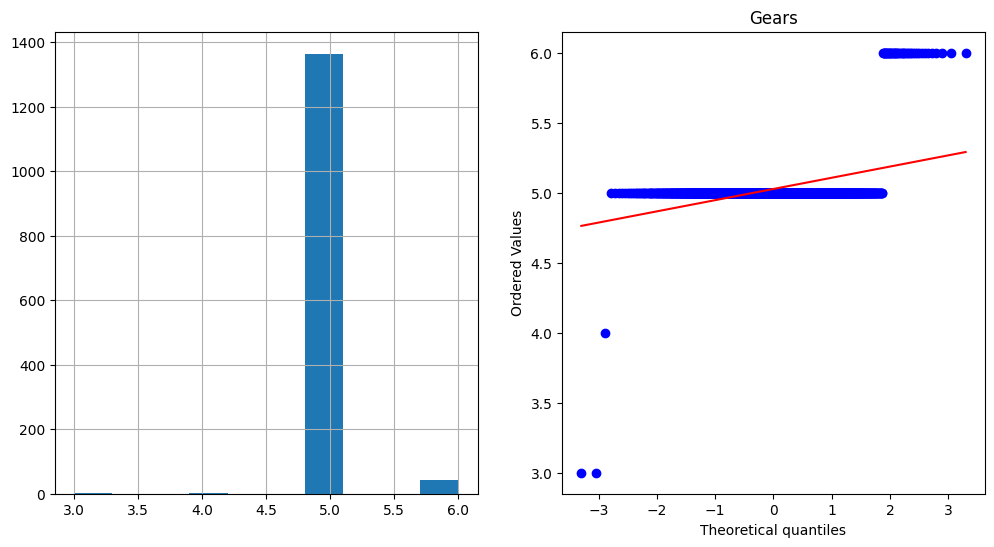

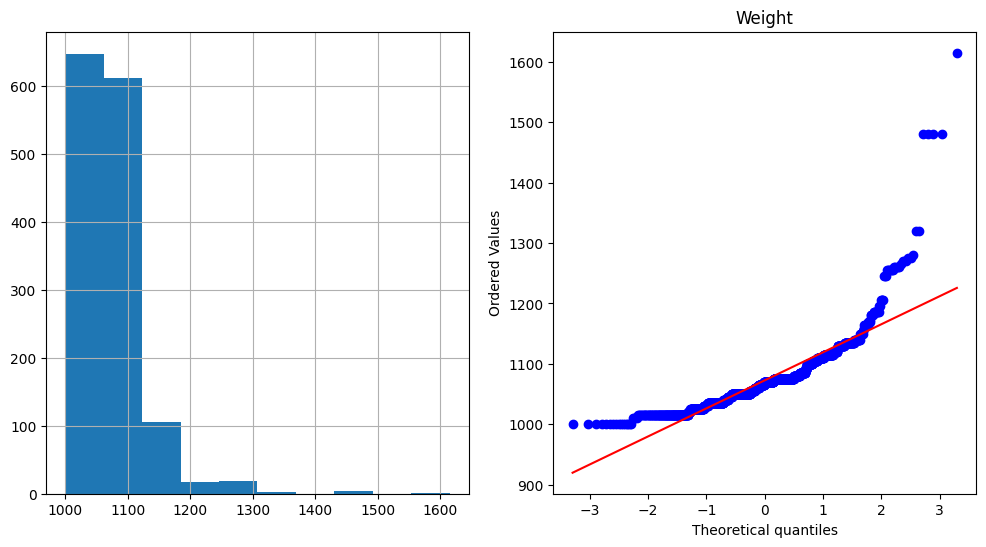

In [25]:
df=toyota.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])
plot_toyota(toyota,'KM')
plt.title('KM')
plot_toyota(toyota,'HP')
plt.title('HP')
plot_toyota(toyota,'Gears')
plt.title('Gears')
plot_toyota(toyota,'Weight')
plt.title('Weight')

In [26]:
toyota.columns

Index(['KM', 'HP', 'Gears', 'Weight'], dtype='object')

In [27]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('KM',shapiro(toyota.KM),'\n'
     'HP',shapiro(toyota.HP),'\n'
     'Weight ',shapiro(toyota.Weight),'\n'
     'Gears',shapiro(toyota.Gears))


KM ShapiroResult(statistic=0.9475462436676025, pvalue=5.3270375912607255e-22) 
HP ShapiroResult(statistic=0.7059299349784851, pvalue=3.2229864679470793e-44) 
Weight  ShapiroResult(statistic=0.7820412516593933, pvalue=8.943563240798853e-40) 
Gears ShapiroResult(statistic=0.17891669273376465, pvalue=0.0)


In [32]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   KM      1410 non-null   int64
 1   HP      1410 non-null   int64
 2   Gears   1410 non-null   int64
 3   Weight  1410 non-null   int64
dtypes: int64(4)
memory usage: 44.2 KB


In [30]:
toyota.describe()

,KM,HP,Gears,Weight
count,1410.000000,1410.000000,1410.000000,1410.000000
mean,68857.097163,101.472340,5.026950,1072.682270
std,37614.045301,15.057576,0.190207,52.470233
min,1.000000,69.000000,3.000000,1000.000000
25%,43000.000000,87.000000,5.000000,1040.000000
50%,63713.500000,110.000000,5.000000,1070.000000
75%,87720.750000,110.000000,5.000000,1085.000000
max,243000.000000,192.000000,6.000000,1615.000000


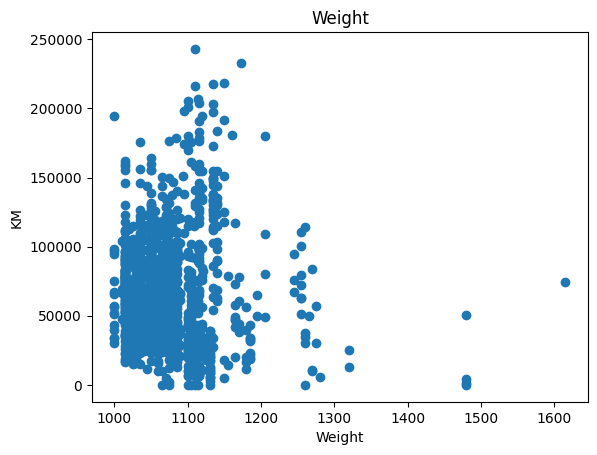

In [33]:
for feature in continuous_feature:
    if feature!="KM":
        df=toyota.copy()
        plt.scatter(df[feature],df['KM'])
        plt.xlabel(feature)
        plt.ylabel('KM')
        plt.title(feature)
        plt.show()

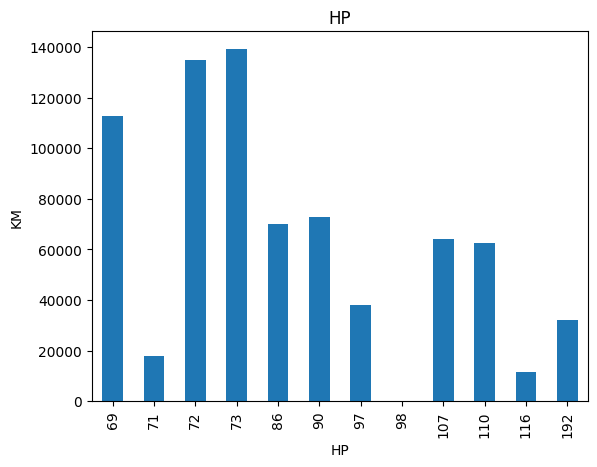

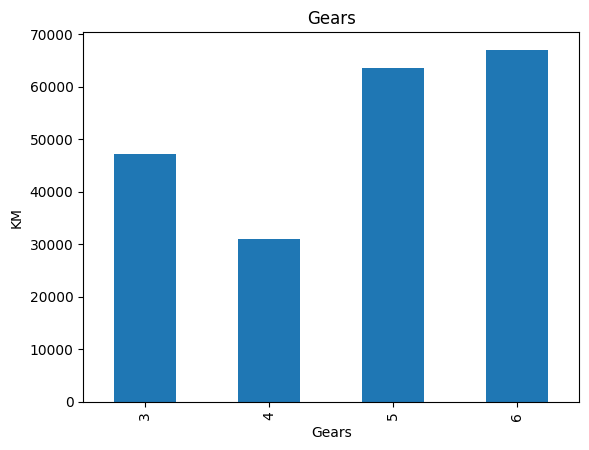

In [35]:
for feature in discrete_feature:
    df=toyota.copy()
    df.groupby(feature)["KM"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("KM")
    plt.title(feature)
    plt.show()

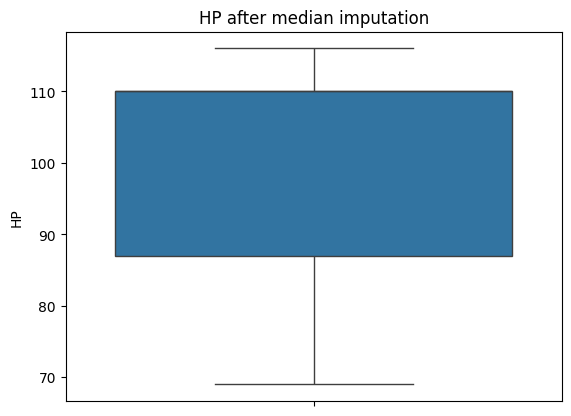

In [51]:
df1=toyota.copy()
for i in toyota['HP']:
    q1 = np.quantile(df1.HP,0.25)
    q3 = np.quantile(df1.HP,0.75)
    med = np.median(df1.HP)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['HP'] = df1['HP'].replace(i, np.median(df1['HP']))
sns.boxplot(df1['HP'])
plt.title('HP after median imputation')
plt.show()

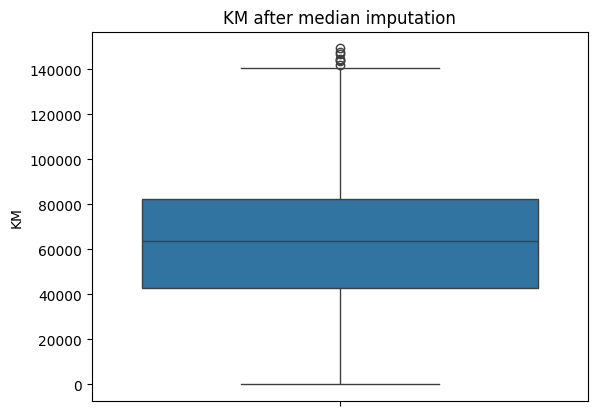

In [58]:
for i in toyota['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

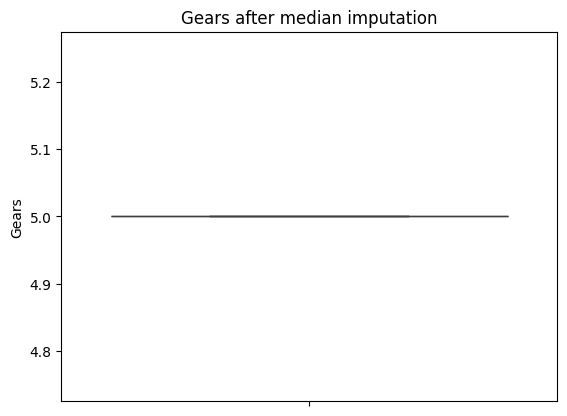

In [66]:
for i in toyota['Gears']:
    q1 = np.quantile(df1.Gears,0.25)
    q3 = np.quantile(df1.Gears,0.75)
    med = np.median(df1.Gears)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Gears'] = df1['Gears'].replace(i, np.median(df1['Gears']))
sns.boxplot(df1['Gears'])
plt.title('Gears after median imputation')
plt.show()

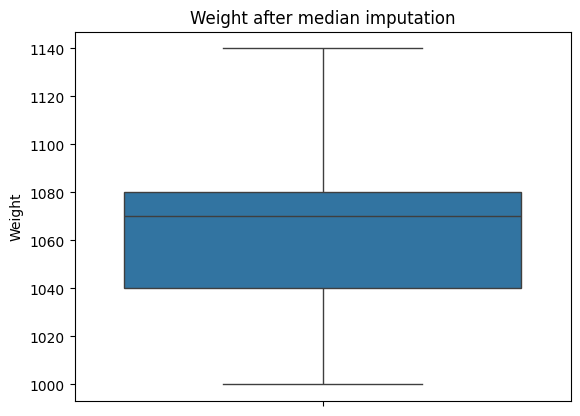

In [62]:
for i in toyota['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

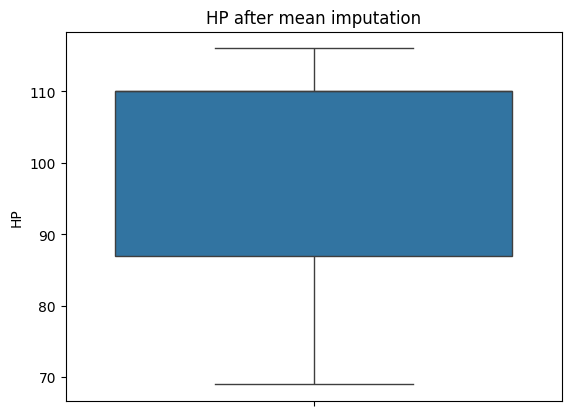

In [80]:
df2=toyota.copy()
for i in toyota['HP']:
    q1 = np.quantile(df2.HP,0.25)
    q3 = np.quantile(df2.HP,0.75)
    med = np.median(df2.HP)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['HP'] = df2['HP'].replace(i, np.mean(df2['HP']))
sns.boxplot(df2['HP'])
plt.title('HP after mean imputation')
plt.show()


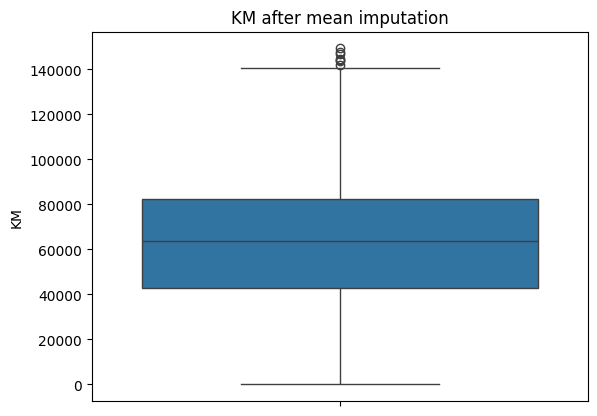

In [81]:
df2=toyota.copy()
for i in toyota['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

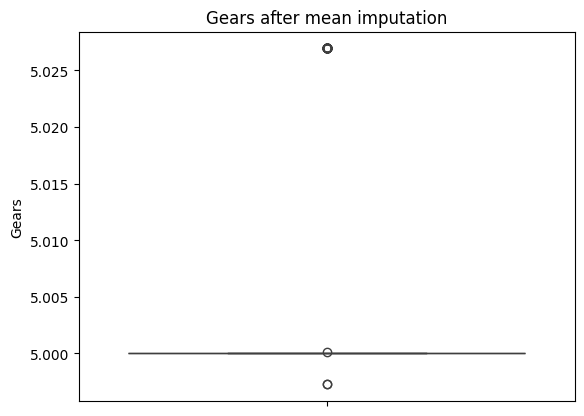

In [82]:
for i in toyota['Gears']:
    q1 = np.quantile(df2.Gears,0.25)
    q3 = np.quantile(df2.Gears,0.75)
    med = np.median(df2.Gears)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Gears'] = df2['Gears'].replace(i, np.mean(df2['Gears']))
sns.boxplot(df2['Gears'])
plt.title('Gears after mean imputation')
plt.show()

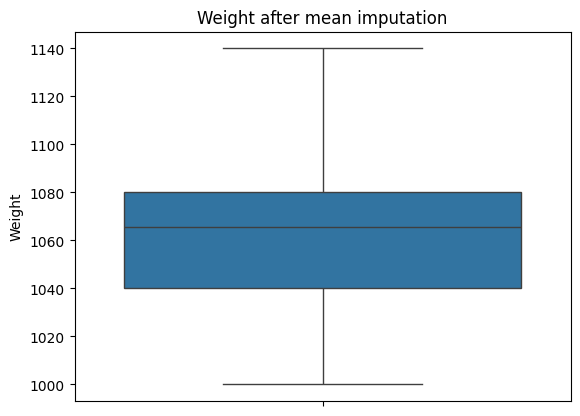

In [83]:
for i in toyota['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

In [85]:

after_mean_imputation_model = smf.ols("HP~Gears+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.1053245915206652, 0.10341561127497667)

Text(0.5, 1.0, 'HP after removing outliers')

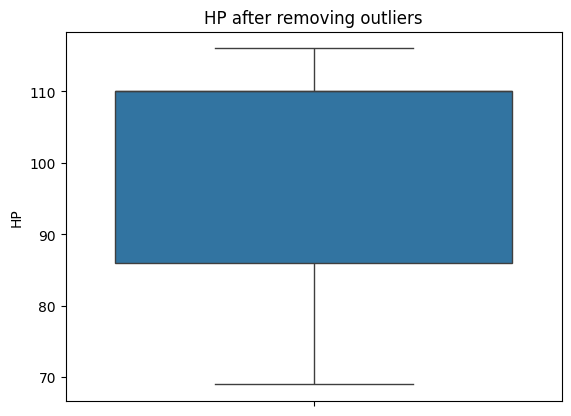

In [86]:
df3=toyota.copy()
def drop_outliers(toyota, field_name):
    iqr = 1.5*(np.percentile(toyota[field_name], 75) - np.percentile(toyota[field_name], 25))
    toyota.drop(toyota[toyota[field_name] > (iqr + np.percentile(toyota[field_name], 75))].index, inplace=True)
    toyota.drop(toyota[toyota[field_name] < (np.percentile(toyota[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df3, 'HP')
sns.boxplot(df3.HP)
plt.title('HP after removing outliers')

Text(0.5, 1.0, 'Gears after removing outliers')

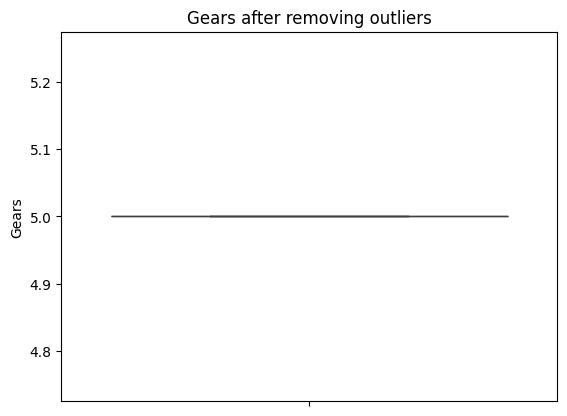

In [87]:
drop_outliers(df3, 'Gears')
sns.boxplot(df3.Gears)
plt.title('Gears after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

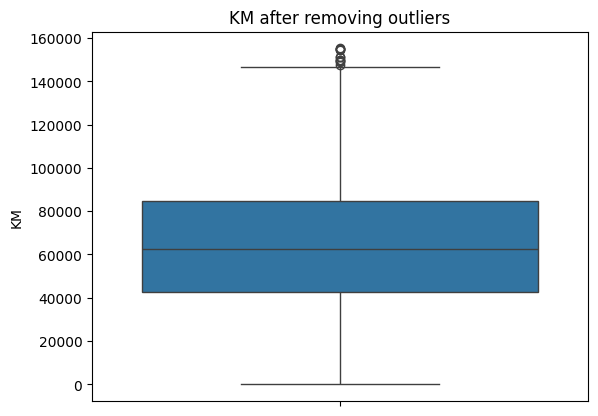

In [88]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

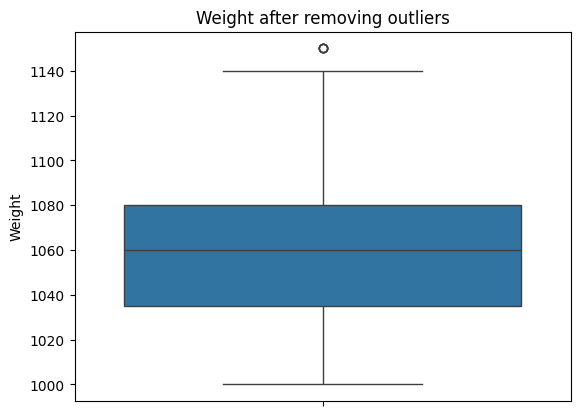

In [89]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers')

In [90]:
removed_outlier_model = smf.ols("HP~Gears+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.05714849972523006, 0.05565428181671228)

In [91]:
np.sqrt(removed_outlier_model.mse_resid)

11.937196248624351

In [94]:
log_transfomed = toyota.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("HP~Gears+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj


(0.07794236873452798, 0.07597496269342097)

In [95]:
cube_root_transfomed = toyota.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("HP~Gears+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj

(0.12591320562361064, 0.124048155564486)

In [97]:
toyota.columns

Index(['KM', 'HP', 'Gears', 'Weight'], dtype='object')

In [104]:
raw_data_model = smf.ols("KM~Weight+HP+Gears", data = toyota).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     63.13
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.71e-38
Time:                        05:54:17   Log-Likelihood:                -16766.
No. Observations:                1410   AIC:                         3.354e+04
Df Residuals:                    1406   BIC:                         3.356e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.741e+04   3.12e+04      2.162      0.031    6245.156    1.29e+05
Weight         3.0355     18.011      0.169      0.866     -32.295      38.366
HP          -880.5434     64.188    -13.718      0.000   -1006.459    -754.628
Gears       1.742e+04   5064.607      3.439      0.001    7480.329    2.74e+04
==============================================================================
Omnibus:                      114.081   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.434
Skew:                           0.693   Prob(JB):                     9.66e-33
Kurtosis:                       3.765   Cond. No.                     3.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
np.sqrt(raw_data_model.mse_resid)

35348.509619443765

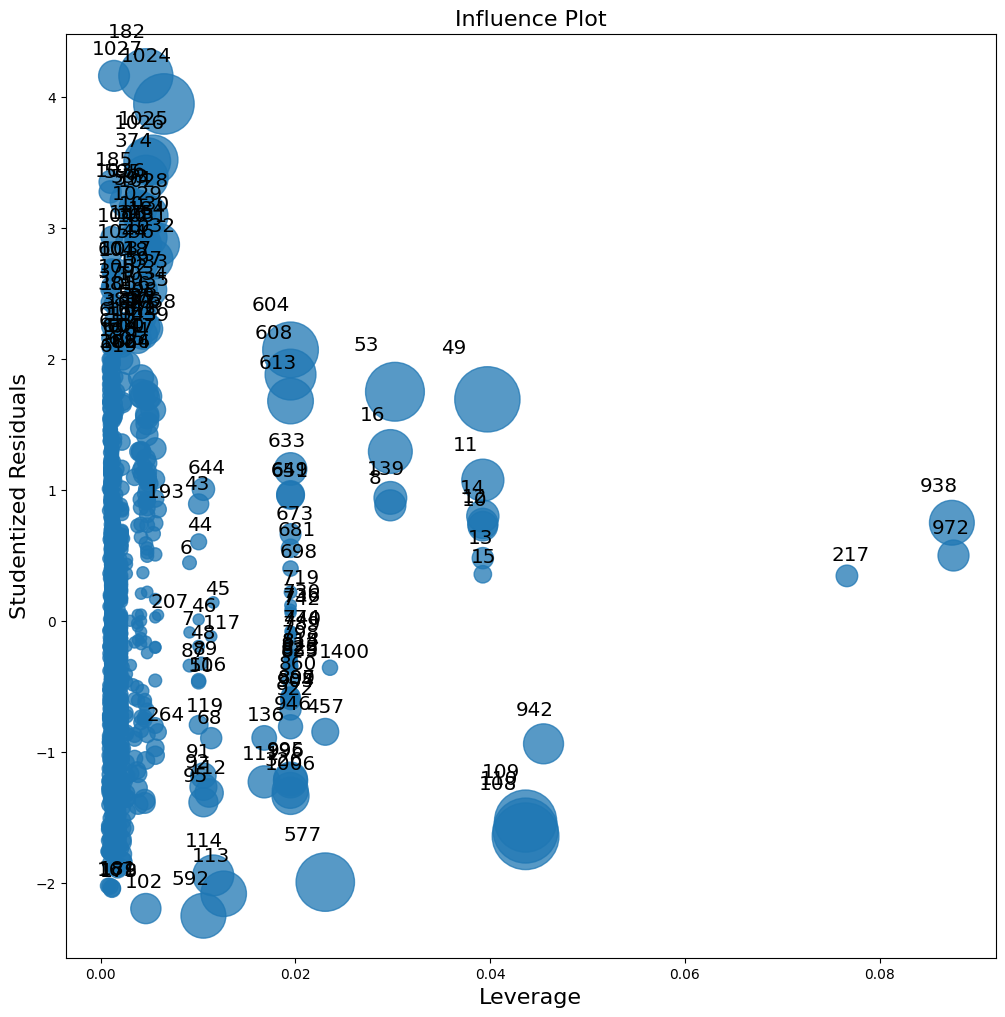

In [107]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(12,12))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

In [109]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.01


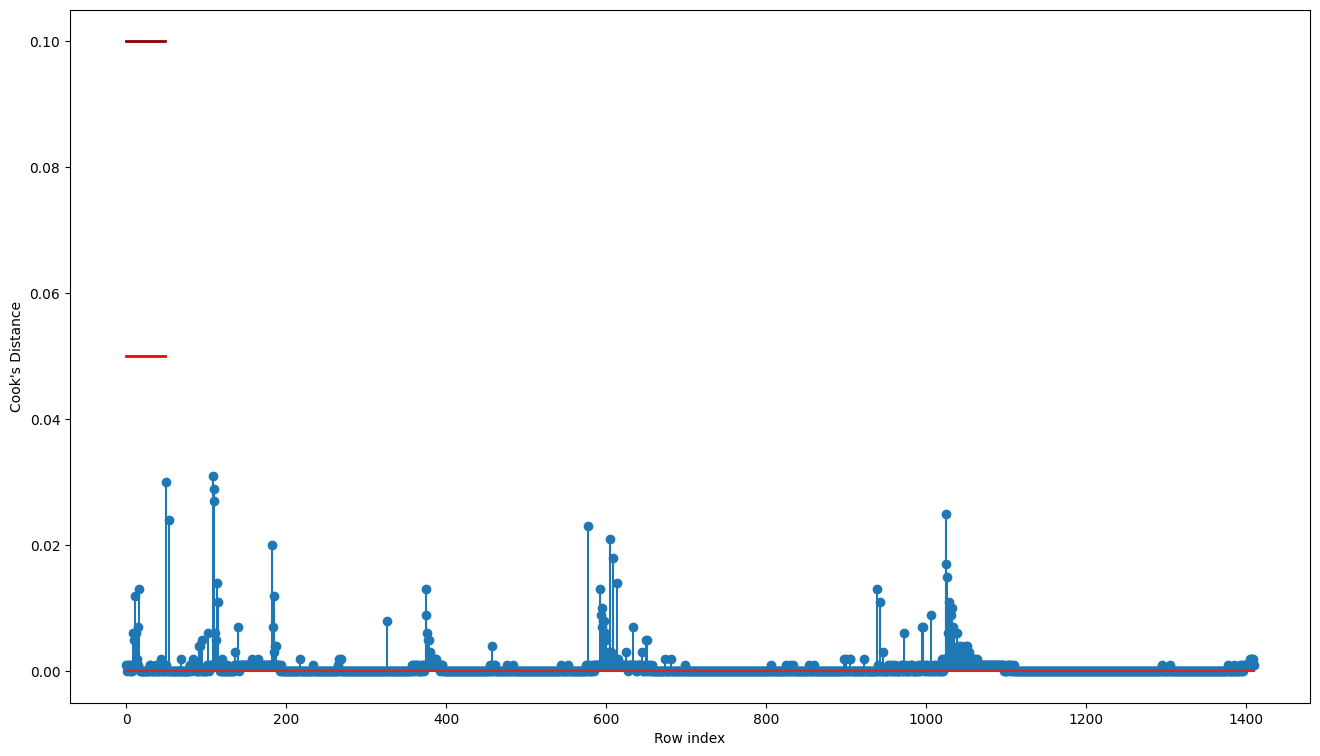

In [111]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [112]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(108, 0.030838784477686378)

In [114]:
toyota[toyota.index.isin([80])]

,KM,HP,Gears,Weight
80,20019,110,5,1180


In [115]:
dataframe= toyota.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,KM,HP,Gears,Weight
0,46986,90,5,1165
1,72937,90,5,1165
2,41711,90,5,1165
3,48000,90,5,1165
4,38500,90,5,1170


In [116]:
toyota.shape

(1410, 4)

In [118]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('KM~HP+Gears+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('KM~HP+Gears+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.11813659392034559
Thus model accuracy is improved to 0.11791851029677847
Thus model accuracy is improved to 0.11786764498382729
Thus model accuracy is improved to 0.119492618809935
Thus model accuracy is improved to 0.11689647466802044
Thus model accuracy is improved to 0.11854197681242029
Thus model accuracy is improved to 0.12028812180652149
Thus model accuracy is improved to 0.11999974638213307
Thus model accuracy is improved to 0.11706455345523636
Thus model accuracy is improved to 0.11685523740362147
Thus model accuracy is improved to 0.11443706645893392
Thus model accuracy is improved to 0.11429589298724574
Thus model accuracy is improved to 0.11543963718066774
Thus model accuracy is improved to 0.11677785983559641
Thus model accuracy is improved to 0.11750463734085759
Thus model accuracy is improved to 0.11497279359398205
Thus model accuracy is improved to 0.11621438274059792
Thus model accuracy is improved to 0.11551027629451349
Thus model a

In [119]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [121]:
dataframe.shape

(109, 4)

In [122]:


dataframe.head()

,KM,HP,Gears,Weight
0,64564,110,5,1080
1,62000,110,5,1075
2,61200,110,5,1045
3,61000,110,5,1075
4,60829,110,5,1075


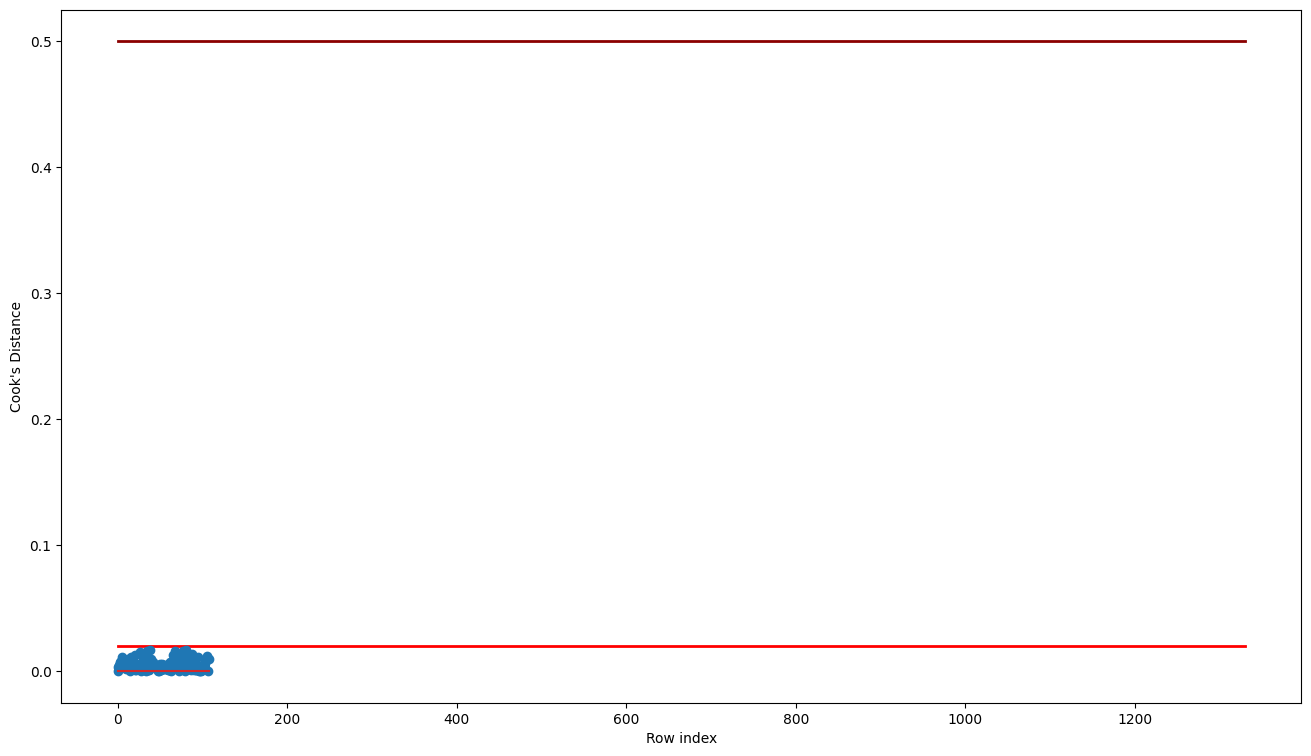

In [123]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [124]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     330.6
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.52e-53
Time:                        06:02:30   Log-Likelihood:                -979.52
No. Observations:                 109   AIC:                             1967.
Df Residuals:                     105   BIC:                             1978.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.599e+05   1.41e+04    -11.353      0.000   -1.88e+05   -1.32e+05
HP           481.1459     30.857     15.593      0.000     419.963     542.329
Gears       6764.4642   1409.985      4.798      0.000    3968.723    9560.205
Weight       127.0505     13.559      9.370      0.000     100.166     153.935
==============================================================================
Omnibus:                       13.843   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.312
Skew:                           0.041   Prob(JB):                        0.116
Kurtosis:                       2.029   Cond. No.                     7.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
np.sqrt(final_model.mse_resid)

1970.6906582325103

In [126]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Gears'] = np.log(dataframe.Gears)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

,Gears,KM,Weight,HP
0,1.609438,11.075412,6.984716,110
1,1.609438,11.034890,6.980076,110
2,1.609438,11.021902,6.951772,110
3,1.609438,11.018629,6.980076,110
4,1.609438,11.015822,6.980076,110


In [127]:
log_transformed_model = smf.ols("KM~HP+Gears+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     402.9
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           1.94e-57
Time:                        06:04:53   Log-Likelihood:                 221.22
No. Observations:                 109   AIC:                            -434.4
Df Residuals:                     105   BIC:                            -423.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2324      1.614     -3.860      0.000      -9.434      -3.031
HP             0.0092      0.001     18.116      0.000       0.008       0.010
Gears          0.5685      0.127      4.472      0.000       0.316       0.821
Weight         2.2006      0.236      9.337      0.000       1.733       2.668
==============================================================================
Omnibus:                       19.165   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.994
Skew:                          -0.031   Prob(JB):                       0.0823
Kurtosis:                       1.953   Cond. No.                     5.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Gears'] = np.cbrt(dataframe.Gears)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

,Gears,KM,Weight,HP
0,1.709976,40.117157,10.259856,110
1,1.709976,39.578916,10.243998,110
2,1.709976,39.407947,10.147805,110
3,1.709976,39.364972,10.243998,110
4,1.709976,39.328154,10.243998,110


In [129]:
cbrt_transformed_model = smf.ols("KM~HP+Gears+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     378.1
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           4.16e-56
Time:                        06:07:15   Log-Likelihood:                -59.010
No. Observations:                 109   AIC:                             126.0
Df Residuals:                     105   BIC:                             136.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.0424      9.940     -8.254      0.000    -101.752     -62.333
HP             0.1148      0.007     17.266      0.000       0.102       0.128
Gears         12.9828      2.829      4.589      0.000       7.373      18.592
Weight         8.5017      0.908      9.366      0.000       6.702      10.301
==============================================================================
Omnibus:                       17.299   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.756
Skew:                          -0.006   Prob(JB):                       0.0927
Kurtosis:                       1.977   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Gears'] = np.sqrt(dataframe.Gears)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

,Gears,KM,Weight,HP
0,2.236068,254.094471,32.863353,110
1,2.236068,248.997992,32.787193,110
2,2.236068,247.386338,32.326460,110
3,2.236068,246.981781,32.787193,110
4,2.236068,246.635358,32.787193,110


In [131]:
sqrt_transformed_model = smf.ols("KM~HP+Gears+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     365.9
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.01e-55
Time:                        06:09:14   Log-Likelihood:                -303.30
No. Observations:                 109   AIC:                             614.6
Df Residuals:                     105   BIC:                             625.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -550.6440     60.889     -9.043      0.000    -671.376    -429.912
HP             1.0529      0.063     16.843      0.000       0.929       1.177
Gears         62.0349     13.357      4.644      0.000      35.550      88.520
Weight        16.7130      1.783      9.374      0.000      13.178      20.248
==============================================================================
Omnibus:                       16.364   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.637
Skew:                           0.006   Prob(JB):                       0.0984
Kurtosis:                       1.990   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
df_robust_scaled = dataframe.copy()
columns= ['HP','Gears','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,KM,HP,Gears,Weight
0,0.597686,0.0,0.0,1.0
1,0.167701,0.0,0.0,0.8
2,0.033540,0.0,0.0,-0.4
3,0.000000,0.0,0.0,0.8
4,-0.028677,0.0,0.0,0.8


In [133]:
robust_transformed_model = smf.ols("KM~HP+Gears+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     330.6
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.52e-53
Time:                        06:10:58   Log-Likelihood:                -31.943
No. Observations:                 109   AIC:                             71.89
Df Residuals:                     105   BIC:                             82.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0172      0.040     -0.427      0.671      -0.097       0.063
HP             0.0807      0.005     15.593      0.000       0.070       0.091
Gears          1.1344      0.236      4.798      0.000       0.666       1.603
Weight         0.5327      0.057      9.370      0.000       0.420       0.645
==============================================================================
Omnibus:                       13.843   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.312
Skew:                           0.041   Prob(JB):                        0.116
Kurtosis:                       2.029   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,KM,HP,Gears,Weight
0,0.843883,0.50036,-0.136717,1.235019
1,0.433710,0.50036,-0.136717,0.967391
2,0.305731,0.50036,-0.136717,-0.638380
3,0.273736,0.50036,-0.136717,0.967391
4,0.246380,0.50036,-0.136717,0.967391


In [136]:
standard_scaler_transformed_model = smf.ols("KM~HP+Gears+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     330.6
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.52e-53
Time:                        06:12:25   Log-Likelihood:                -26.801
No. Observations:                 109   AIC:                             61.60
Df Residuals:                     105   BIC:                             72.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.082e-16      0.030  -1.02e-14      1.000      -0.060       0.060
HP             0.6323      0.041     15.593      0.000       0.552       0.713
Gears          0.1452      0.030      4.798      0.000       0.085       0.205
Weight         0.3797      0.041      9.370      0.000       0.299       0.460
==============================================================================
Omnibus:                       13.843   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.312
Skew:                           0.041   Prob(JB):                        0.116
Kurtosis:                       2.029   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
model = smf.ols("KM~HP+Gears+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     330.6
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.52e-53
Time:                        06:13:21   Log-Likelihood:                -26.801
No. Observations:                 109   AIC:                             61.60
Df Residuals:                     105   BIC:                             72.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.082e-16      0.030  -1.02e-14      1.000      -0.060       0.060
HP             0.6323      0.041     15.593      0.000       0.552       0.713
Gears          0.1452      0.030      4.798      0.000       0.085       0.205
Weight         0.3797      0.041      9.370      0.000       0.299       0.460
==============================================================================
Omnibus:                       13.843   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.312
Skew:                           0.041   Prob(JB):                        0.116
Kurtosis:                       2.029   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

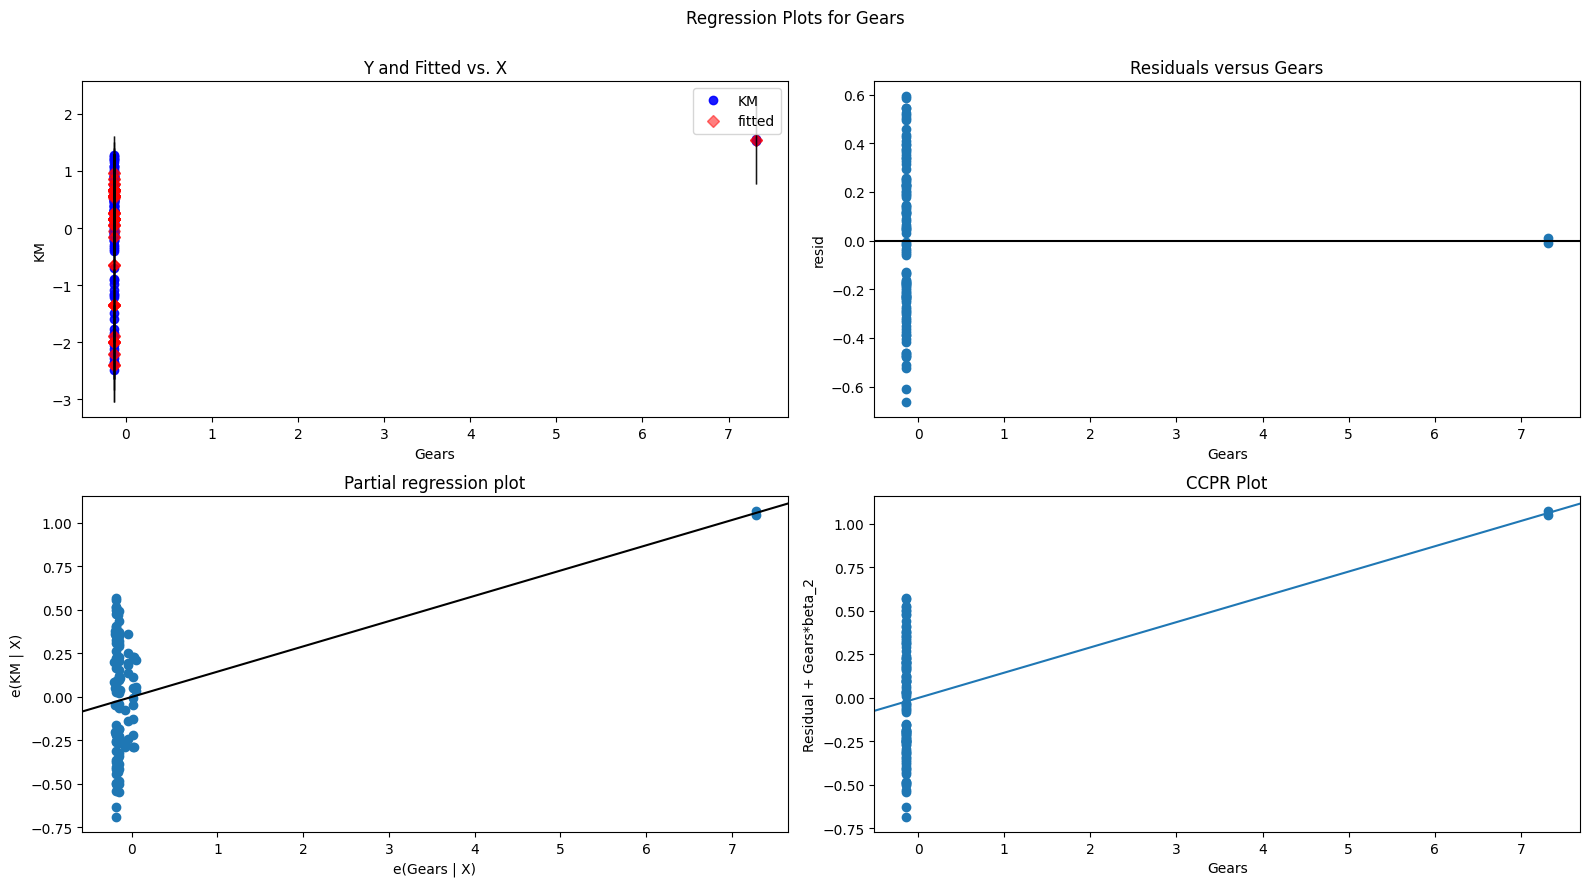

In [138]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['HP'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,KM,3.15
2,Weight,3.02
1,Gears,1.09


In [140]:
r_sqr_weight = smf.ols('KM~HP+Gears+Weight', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_hp = smf.ols('KM~HP+Gears+Weight', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_km = smf.ols('KM~HP+Gears+Weight', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('KM~HP+Gears+Weight', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
vif_frame = pd.DataFrame({'Variables':['Weight','Gears','KM','HP'], 'VIF':[vif_hp,vif_weight,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Weight,10.444834
Gears,10.444834
KM,10.444834
HP,10.444834


In [142]:
#Simple Linear Model using KM
km_model = smf.ols('HP~KM', data=df_standard_scaled).fit()
km_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     432.6
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           2.19e-39
Time:                        06:20:09   Log-Likelihood:                -66.487
No. Observations:                 109   AIC:                             137.0
Df Residuals:                     107   BIC:                             142.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.541e-16      0.043   1.05e-14      1.000      -0.085       0.085
KM             0.8954      0.043     20.798      0.000       0.810       0.981
==============================================================================
Omnibus:                       13.872   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.292
Skew:                          -0.006   Prob(JB):                        0.117
Kurtosis:                       2.028   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
gears_model = smf.ols('HP~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5031
Date:                Wed, 24 Jan 2024   Prob (F-statistic):              0.480
Time:                        06:20:56   Log-Likelihood:                -154.41
No. Observations:                 109   AIC:                             312.8
Df Residuals:                     107   BIC:                             318.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.541e-16      0.096   4.71e-15      1.000      -0.191       0.191
Gears          0.0684      0.096      0.709      0.480      -0.123       0.260
==============================================================================
Omnibus:                       37.012   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.537
Skew:                          -1.699   Prob(JB):                     1.18e-13
Kurtosis:                       4.249   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
gears_qt_weight_model = smf.ols('HP~Gears+KM', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     236.4
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           8.43e-40
Time:                        06:21:26   Log-Likelihood:                -62.146
No. Observations:                 109   AIC:                             130.3
Df Residuals:                     106   BIC:                             138.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.541e-16      0.042   1.09e-14      1.000      -0.082       0.082
Gears         -0.1260      0.043     -2.964      0.004      -0.210      -0.042
KM             0.9220      0.043     21.682      0.000       0.838       1.006
==============================================================================
Omnibus:                       15.039   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.533
Skew:                           0.069   Prob(JB):                        0.104
Kurtosis:                       2.011   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','HP'], axis=1)
x.columns

Index(['KM', 'HP', 'Weight'], dtype='object')

In [149]:
model_1 = smf.ols('KM~HP+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     401.0
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           3.63e-50
Time:                        06:23:20   Log-Likelihood:                -37.603
No. Observations:                 109   AIC:                             81.21
Df Residuals:                     106   BIC:                             89.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.909e-16      0.033  -8.77e-15      1.000      -0.066       0.066
HP             0.6398      0.045     14.370      0.000       0.552       0.728
Weight         0.3832      0.045      8.607      0.000       0.295       0.472
==============================================================================
Omnibus:                        3.359   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                3.017
Skew:                           0.406   Prob(JB):                        0.221
Kurtosis:                       3.059   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
toyota.corr()

,KM,HP,Gears,Weight
KM,1.000000,-0.333592,0.013900,-0.023505
HP,-0.333592,1.000000,0.210645,0.083758
Gears,0.013900,0.210645,1.000000,0.020272
Weight,-0.023505,0.083758,0.020272,1.000000


<Axes: >

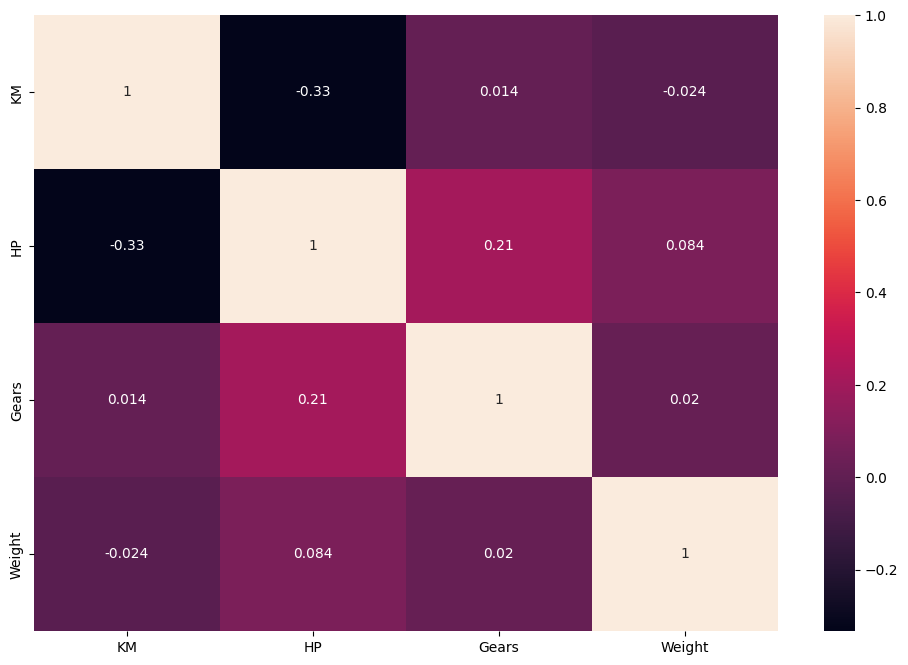

In [152]:
plt.figure(figsize=(12,8))
sns.heatmap(
    toyota.corr(),
    annot=True)

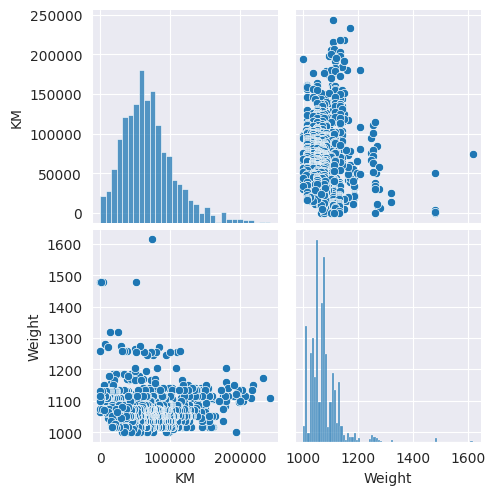

In [154]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota[continuous_feature])

In [155]:
df_standard_scaled.head()

,KM,HP,Gears,Weight
0,0.843883,0.50036,-0.136717,1.235019
1,0.433710,0.50036,-0.136717,0.967391
2,0.305731,0.50036,-0.136717,-0.638380
3,0.273736,0.50036,-0.136717,0.967391
4,0.246380,0.50036,-0.136717,0.967391


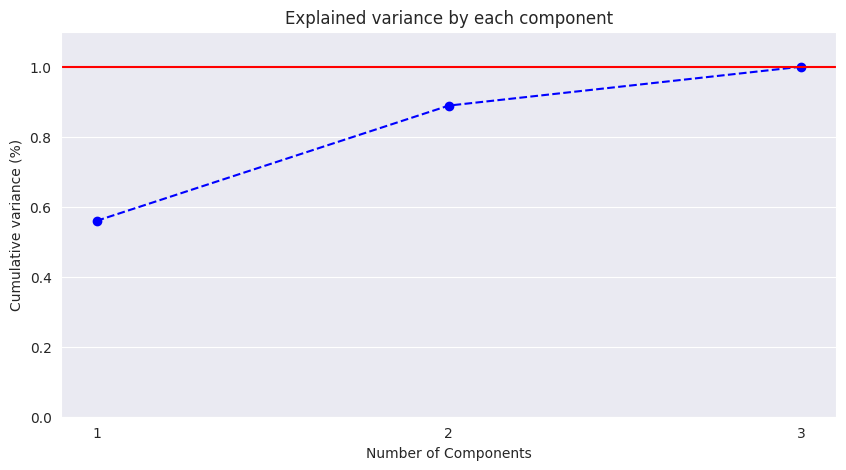

In [156]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [157]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.55957479, 0.32936398, 0.11106123])

Text(0.5, 1.0, 'Explained variance by each component')

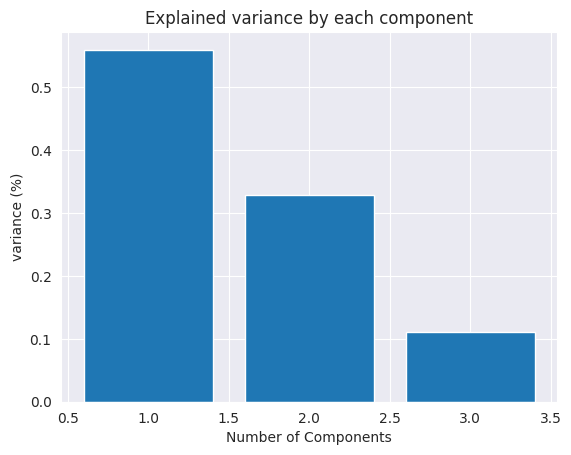

In [158]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [159]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 55.96,  88.9 , 100.01])

In [169]:
X = dataframe.drop('HP', axis =1)
Y = dataframe[['HP']]
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  1


In [170]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [172]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'KM ~ HP + Weight + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

          coef          err varname
0   481.145894    61.182800      HP
1   127.050535    26.884426  Weight
2  6764.464194  2795.740773   Gears


<Axes: title={'center': 'Modal Coefficients'}, xlabel='varname'>

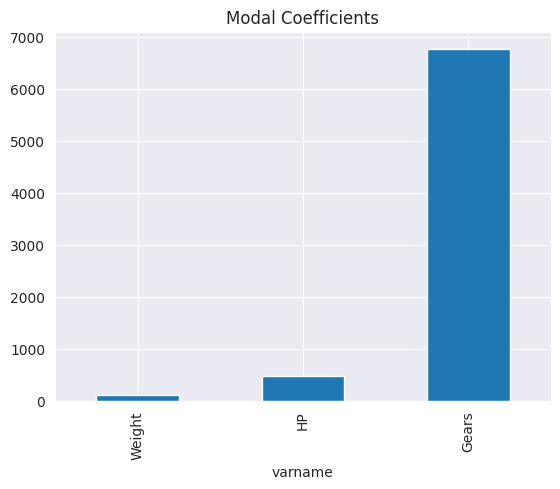

In [173]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

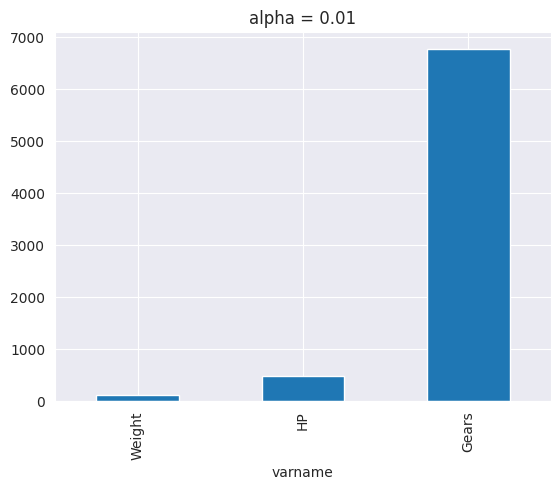

In [174]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01')

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

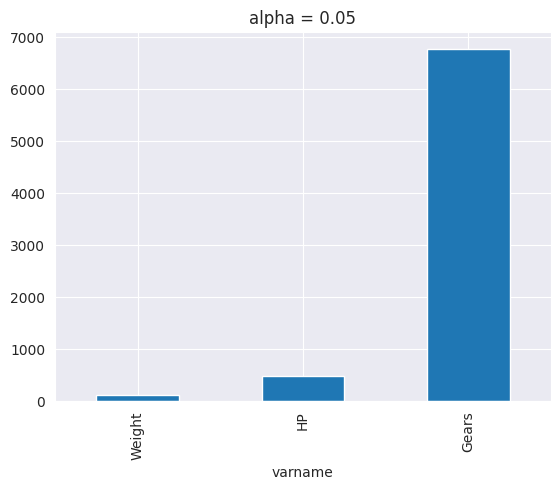

In [175]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

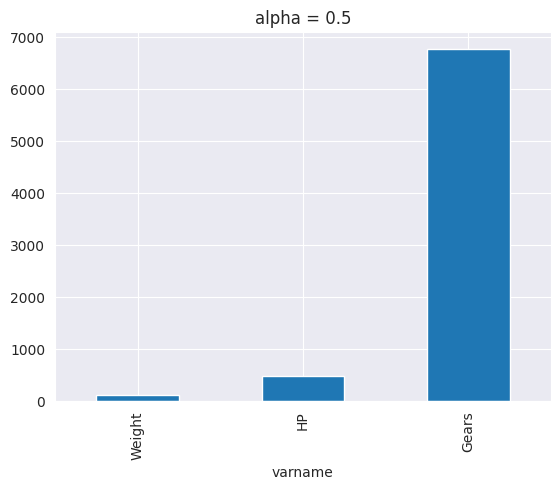

In [176]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

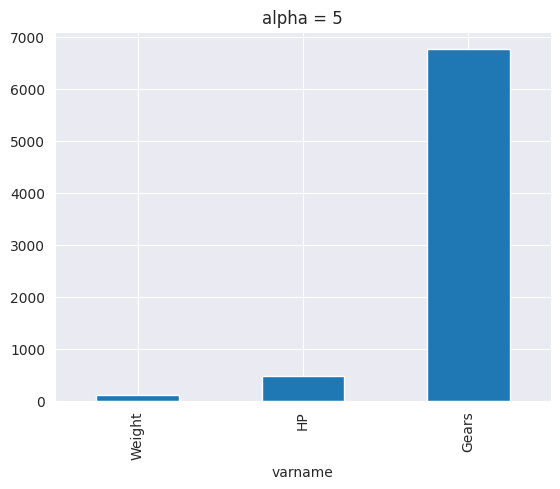

In [177]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

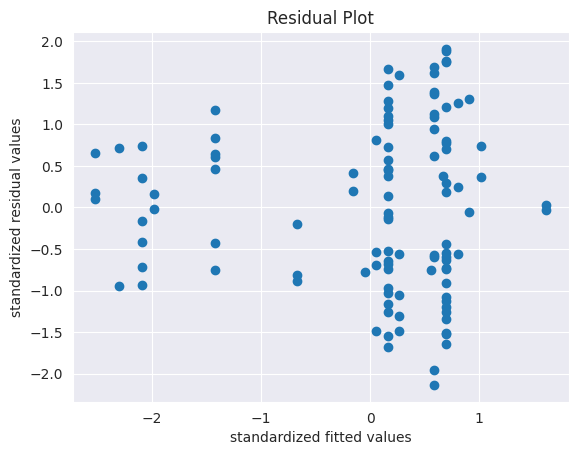

In [179]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [182]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyota)
pred_y

0       65250.171449
1       65250.171449
2       65250.171449
3       65250.171449
4       65885.424125
            ...     
1405    45538.512955
1406    44268.007604
1407    44268.007604
1408    44268.007604
1409    68393.512028
Length: 1410, dtype: float64